In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


### Load Dataset:-

In [2]:
df=pd.read_csv(r"D:\Final_Year_Project\data\ADMISSIONS.csv")
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,09-04-2196 12:26,10-04-2196 15:54,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,09-04-2196 10:06,09-04-2196 13:24,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,03-09-2153 07:15,08-09-2153 19:10,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,18-10-2157 19:34,25-10-2157 14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,06-06-2139 16:14,09-06-2139 12:48,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,02-11-2160 02:06,05-11-2160 14:55,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,02-11-2160 01:01,02-11-2160 04:27,ACUTE CORONARY SYNDROME,0,1


## Perform Some EDA:-

```
Data Check To Perform:-
1.Check Missing Value.
2.Check Duplicate Value.
3.Check Data Type.
4.Check the number of unique value of each column.
5.Check Statistics of data set.
6.Check various categories present in the different categories column.

### Check the information about Datasets:-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

### shape:-


In [4]:
df.shape

(58976, 19)

### Check missing value:-

In [5]:
df.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

### Check Duplicate Value:-

In [6]:
df.duplicated().sum()

0

<Axes: >

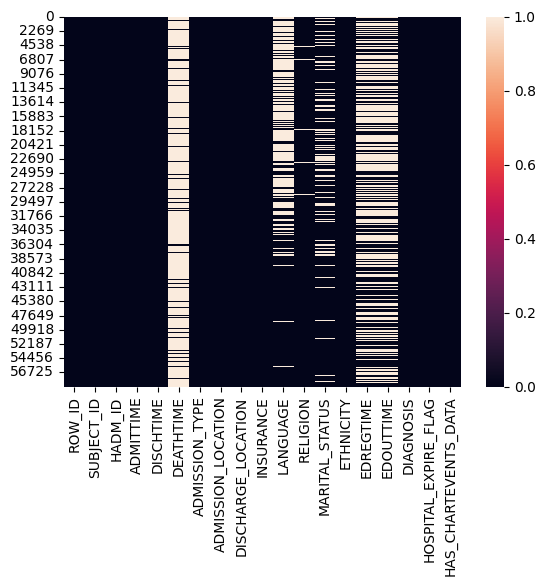

In [7]:
sns.heatmap(df.isnull())

# ➡️Insights or Observation:-

* Datasets have 58976 rows and 19 columns.
* Datasets have no duplicate values.
* Datasets have some missing value in  `DEATHTIME` `LANGUAGE` `RELIGION` `MARITAL_STATUS` `EDREGTIME` `EDOUTTIME` `DIAGNOSIS`

### Handling Missing Value:-

In [8]:
df["DIAGNOSIS"].value_counts()

DIAGNOSIS
NEWBORN                                  7823
PNEUMONIA                                1566
SEPSIS                                   1184
CONGESTIVE HEART FAILURE                  928
CORONARY ARTERY DISEASE                   840
                                         ... 
DIAPHRAGM RUPTURE                           1
RIGHT ANTERIOR CEREBRAL ARTERY STROKE       1
HYPOXIA, ACUTE RENAL FAILURE                1
S/P MOTOR VECHICLE ACCIDENT                 1
JOINT EFFUSION                              1
Name: count, Length: 15682, dtype: int64

### Check Statistics of data set:-

In [9]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,29488.500000,33755.583288,149970.809584,0.099261,0.973006
std,17025.049075,28092.726225,28883.095213,0.299014,0.162067
min,1.000000,2.000000,100001.000000,0.000000,0.000000
25%,14744.750000,11993.750000,124952.750000,0.000000,1.000000
50%,29488.500000,24133.500000,149989.500000,0.000000,1.000000
75%,44232.250000,53851.500000,174966.500000,0.000000,1.000000
max,58976.000000,99999.000000,199999.000000,1.000000,1.000000


### Check Value Counts of each Feature value:-

In [10]:
df.nunique()

ROW_ID                  58976
SUBJECT_ID              46520
HADM_ID                 58976
ADMITTIME               58651
DISCHTIME               58657
DEATHTIME                5834
ADMISSION_TYPE              4
ADMISSION_LOCATION          9
DISCHARGE_LOCATION         17
INSURANCE                   5
LANGUAGE                   75
RELIGION                   20
MARITAL_STATUS              7
ETHNICITY                  41
EDREGTIME               30874
EDOUTTIME               30864
DIAGNOSIS               15682
HOSPITAL_EXPIRE_FLAG        2
HAS_CHARTEVENTS_DATA        2
dtype: int64

In [11]:
df["HOSPITAL_EXPIRE_FLAG"].value_counts()

HOSPITAL_EXPIRE_FLAG
0    53122
1     5854
Name: count, dtype: int64

In [12]:
df["HAS_CHARTEVENTS_DATA"].value_counts()

HAS_CHARTEVENTS_DATA
1    57384
0     1592
Name: count, dtype: int64

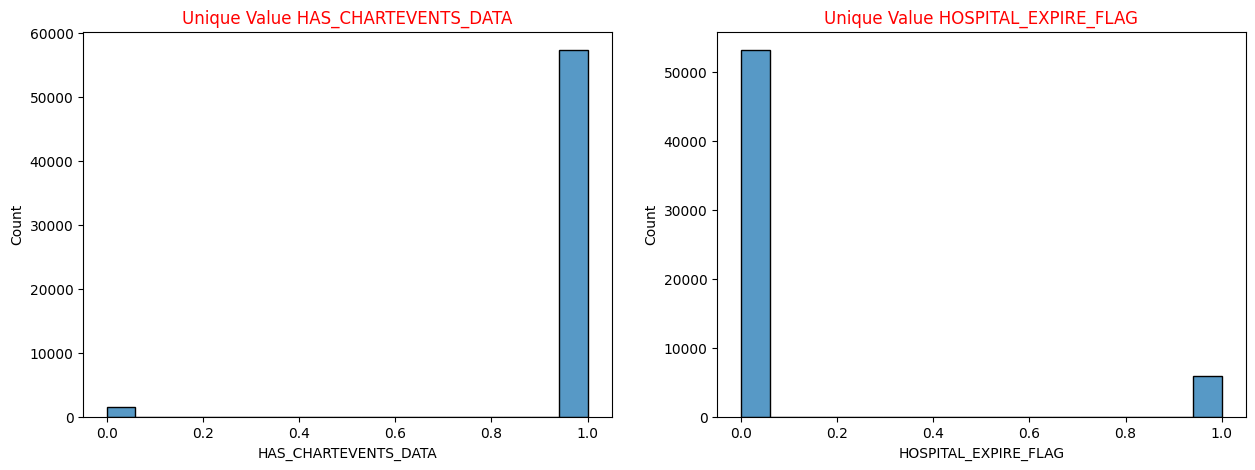

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Unique Value HAS_CHARTEVENTS_DATA",c="red")
sns.histplot(df["HAS_CHARTEVENTS_DATA"])
plt.subplot(1,2,2)
plt.title("Unique Value HOSPITAL_EXPIRE_FLAG",c="red")
sns.histplot(df["HOSPITAL_EXPIRE_FLAG"])
plt.show()

# ➡️Insights or Observation:-
* `HAS_CHARTEVENTS_DATA` column have two unique value `1` and `0`.
* The category with `1` has appeared `57384` times, the category with `0` has appeared `1592` times.
* `HOSPITAL_EXPIRE_FLAG` column have also two unique value `1` and `0`.
* The category with `1` has appeared `5854` times, the category with `0` has appeared `53122` times.


## Segregate Numerical and Categorical Features:-

In [14]:
Categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

In [15]:
Numerical_features=[feature for feature in df.columns if df[feature].dtype=="int64"]

In [16]:
Categorical_features

['ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS']

In [17]:
Numerical_features

['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'HOSPITAL_EXPIRE_FLAG',
 'HAS_CHARTEVENTS_DATA']